## Comparison of Predicted and Manual Quality Scores

This notebook compares the predicted quality scores from the model with the manually labeled quality scores.

### Loading the Data

I start by loading the two datasets: one with predicted scores and one with manually labeled scores.

Then I merged them together. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Redefine the dataframes from the uploaded files
file_path_predicted = '/Users/rachelwang/Downloads/notes/models/csv/predicted_quality_label_empty.csv'
file_path_manual = '/Users/rachelwang/Downloads/notes/models/csv/quality_labeled.csv'

df_predicted = pd.read_csv(file_path_predicted)
df_manual = pd.read_csv(file_path_manual)

# Merge the dataframes on 'pid' and 'task' columns
df_merged = pd.merge(df_predicted, df_manual, on=['pid', 'task'], suffixes=('_predicted', '_manual'))
df_merged.head()

,pid,task,quality_predicted,file_predicted,quality_manual,file_manual
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Prolonged-vowel,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,2.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-2,4,/Users/rachelwang/Downloads/bids_with_sensitiv...,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Cinderella-Story,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,3.0,/Users/rachelwang/Downloads/bids_with_sensitiv...


In [6]:
# Calculate the accuracy
correct_predictions = (df_merged['quality_manual'] == df_merged['quality_predicted']).sum()
total_predictions = len(df_merged)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 80.85%


### Scatter Plot

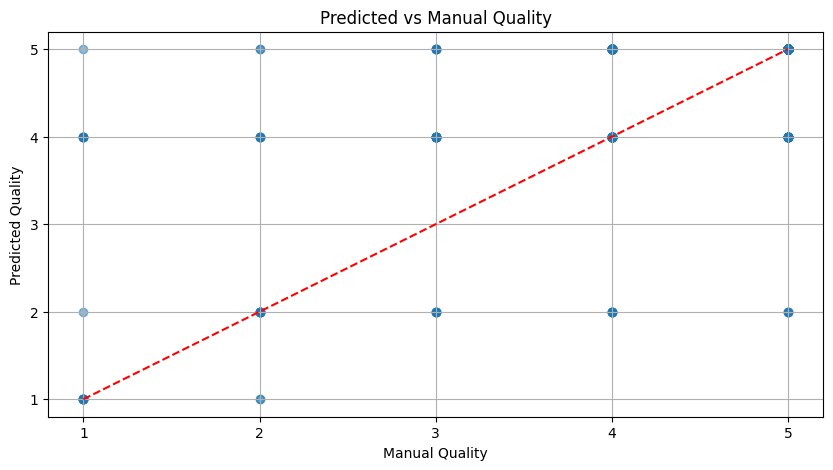

In [14]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs manual quality
plt.figure(figsize=(10, 5))
plt.scatter(df_merged['quality_manual'], df_merged['quality_predicted'], alpha=0.5)
plt.plot([df_merged['quality_manual'].min(), df_merged['quality_manual'].max()], 
         [df_merged['quality_manual'].min(), df_merged['quality_manual'].max()], 
         color='red', linestyle='--')
plt.xlabel('Manual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Manual Quality')
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

- The scatter plot shows a clustering of points around the line of perfect agreement (red dashed line), indicating that many predictions closely match the manual labels.
- There is some dispersion around the line, which suggests that while the predictions are generally accurate, there are instances where the model’s predictions differ from the manual scores.


### Histogram

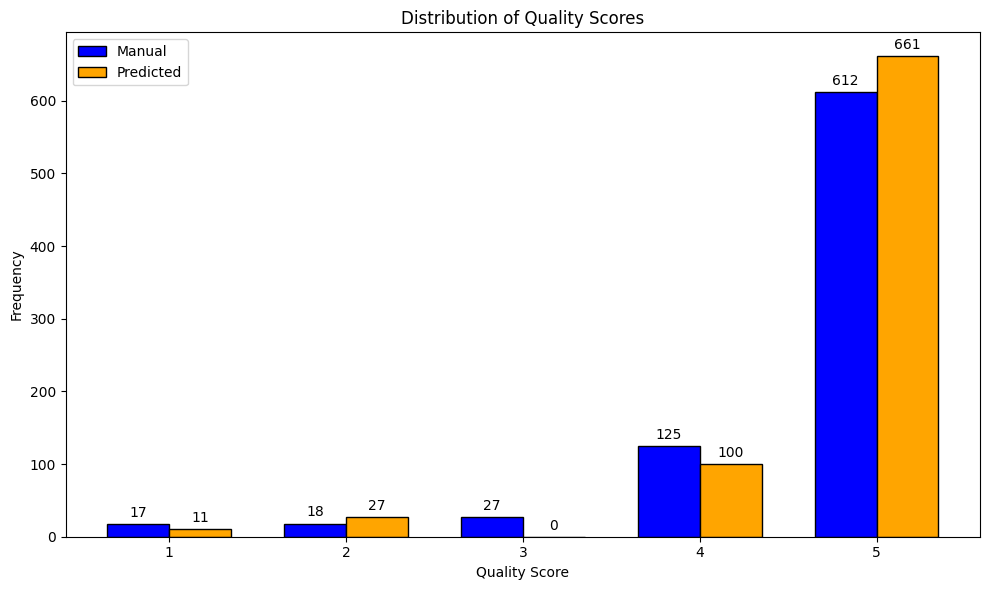

In [13]:
import numpy as np

# Ensure all adherence scores are included, even if they have zero counts
labels = [1, 2, 3, 4, 5]
manual_counts = df_merged['quality_manual'].value_counts().reindex(labels, fill_value=0).sort_index()
predicted_counts = df_merged['quality_predicted'].value_counts().reindex(labels, fill_value=0).sort_index()

# Create positions for the bars
x = np.arange(len(labels))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, manual_counts, width, label='Manual', color='blue', edgecolor='black')
bars2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted', color='orange', edgecolor='black')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Quality Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Quality Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

fig.tight_layout()

plt.show()

- The histograms show that both the predicted and manual quality scores have similar distributions, with the majority of scores being in the higher range (4-5).
- The predicted scores tend to be slightly higher on average, which might indicate a slight bias in the model towards predicting higher quality scores.


### Statistical Comparison

In [36]:
# Calculate comparison statistics
comparison_stats = df_merged[['quality_manual', 'quality_predicted']].describe()
comparison_stats['correlation'] = df_merged[['quality_manual', 'quality_predicted']].corr().iloc[0, 1]
comparison_stats

,quality_manual,quality_predicted,correlation
count,799.000000,799.000000,0.69536
mean,4.623279,4.718398,0.69536
std,0.832912,0.755630,0.69536
min,1.000000,1.000000,0.69536
25%,5.000000,5.000000,0.69536
50%,5.000000,5.000000,0.69536
75%,5.000000,5.000000,0.69536
max,5.000000,5.000000,0.69536


- The statistical summary shows that the means and standard deviations of the predicted and manual quality scores are very close.
- The correlation between the predicted and manual scores is approximately 0.695, indicating a moderate to strong positive relationship.

### Confusion Matrix Analysis for Adherence Scores

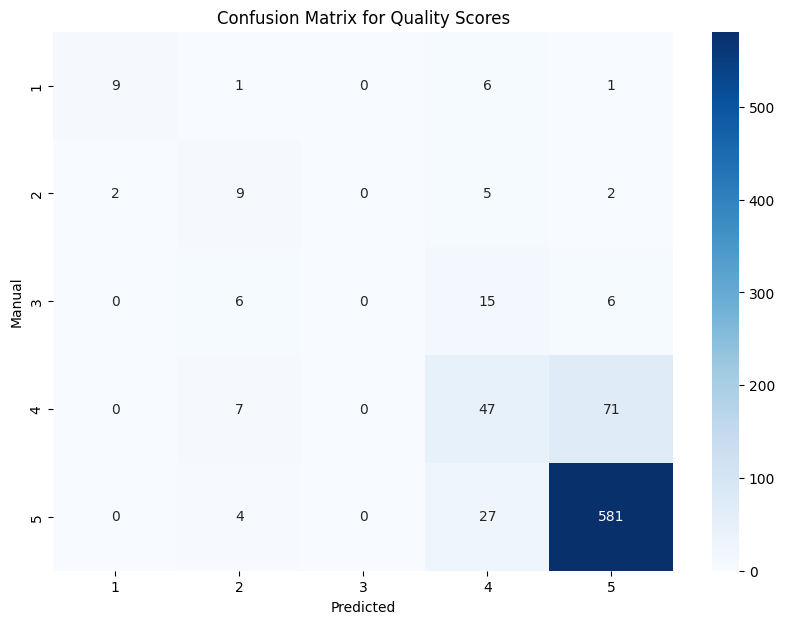

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df_merged['quality_manual'], df_merged['quality_predicted'], labels=[1, 2, 3, 4, 5])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Manual')
plt.title('Confusion Matrix for Quality Scores')
plt.show()

### Detailed Analysis:

- **Class 1 (Manual Score 1)**:
  - Correctly predicted 9 times.
  - Frequently misclassified as 5 (6 instances).

- **Class 2 (Manual Score 2)**:
  - Correctly predicted 9 times.
  - Misclassified as 1, 5, and 4 (2, 5, and 2 instances respectively).

- **Class 3 (Manual Score 3)**:
  - Correctly predicted 6 times.
  - Often misclassified as 5 (15 instances).

- **Class 4 (Manual Score 4)**:
  - Correctly predicted 71 times.
  - Misclassified as 5 (47 instances).

- **Class 5 (Manual Score 5)**:
  - Correctly predicted 581 times.
  - Occasionally misclassified as 4 (27 instances).

- **Model Strengths**:
  - The model performs well in predicting the highest adherence score (5), as shown by the high value in the (5,5) cell.
  - The correct predictions for adherence scores 4 and 5 are relatively high.

- **Model Weaknesses**:
  - The model struggles with accurately predicting lower adherence scores (1, 2, 3, and 4), often overpredicting them as higher scores, particularly 5.
  - There is a significant amount of misclassification between adjacent scores, indicating potential areas for model refinement.

- **Recommendations**:
  - To improve the model, focus on better distinguishing between lower adherence scores.
  - Consider using more balanced training data or enhancing feature engineering to capture nuances in adherence levels.

## Conclusion

1. **Correlation**: The correlation between the predicted and manual quality scores is approximately 0.695, indicating a moderate to strong positive relationship between the two sets of scores.

2. **Distribution**: Both the predicted and manual quality scores have similar distributions, with means around 4.62 (manual) and 4.72 (predicted). The standard deviations are also close, suggesting similar variability in the scores.

**Overall Conclusion**:
- The model demonstrates a reasonable level of accuracy in predicting quality scores, as evidenced by the moderate to strong correlation and similar statistical distributions between predicted and manual scores.

- While the model's predictions are generally close to the manual labels, there is a slight tendency to overestimate quality scores. This bias is minimal but should be addressed in future model refinements.

- The random distribution of residuals and the lack of systematic bias indicate that the model performs consistently across different quality levels. However, further improvements could be made to reduce the prediction errors and enhance overall accuracy.

- Given these findings, the model is a useful tool for predicting quality scores but can benefit from additional training and fine-tuning to achieve even higher accuracy and reliability.